<a href="https://colab.research.google.com/github/Ankitha45/assignment_1/blob/main/assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

In [ ]:
# Load datasets
d__er = pd.read_csv('employee_rating.csv')
d__eg = pd.read_csv('employee_general.csv')

In [ ]:
# Split the column in employee_general dataset
d__eg = d__eg['EmployeeNumber|Education|EducationField|MaritalStatus'].str.split('|', expand=True)
d__eg.columns = ['EmployeeNumber', 'Education', 'EducationField', 'MaritalStatus']
d__eg['EmployeeNumber'] = d__eg['EmployeeNumber'].astype(int)

**# Step 1: Verify datasets and print data types**

In [ ]:
print("Employee Rating Dataset:")
print(d__er.info())
print("\nEmployee General Dataset:")
print(d__eg.info())

Employee Rating Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeNumber           1470 non-null   int64 
 1   Department               1470 non-null   object
 2   EnvironmentSatisfaction  1470 non-null   object
 3   JobRole                  1470 non-null   object
 4   PerformanceRating        1470 non-null   object
 5   YearsAtCompany           1470 non-null   int64 
 6   YearsInCurrentRole       1470 non-null   int64 
 7   MonthlyIncome            1470 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 92.0+ KB
None

Employee General Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  1470 non-null   int64 
 1   Education    

In [ ]:
# Display column names for both datasets
print("\nEmployee Rating Columns:", d__er.columns.tolist())
print("Employee General Columns:", d__eg.columns.tolist())


Employee Rating Columns: ['EmployeeNumber', 'Department', 'EnvironmentSatisfaction', 'JobRole', 'PerformanceRating', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyIncome']
Employee General Columns: ['EmployeeNumber', 'Education', 'EducationField', 'MaritalStatus']


In [ ]:
# Find common columns
common_columns = list(set(d__er.columns) & set(d__eg.columns))
print("\nCommon Columns:", common_columns)


Common Columns: ['EmployeeNumber']


In [ ]:
# Clarify column types
def clarify_type(col_name, dtype):
    if pd.api.types.is_numeric_dtype(dtype):
        return "Numeric"
    elif pd.api.types.is_bool_dtype(dtype):
        return "Binary"
    else:
        return "Nominal"

print("\nEmployee Rating Column Types:")
for col, dtype in d__er.dtypes.items():
    print(f"{col}: {clarify_type(col, dtype)}")

print("\nEmployee General Column Types:")
for col, dtype in d__eg.dtypes.items():
    print(f"{col}: {clarify_type(col, dtype)}")


Employee Rating Column Types:
EmployeeNumber: Numeric
Department: Nominal
EnvironmentSatisfaction: Nominal
JobRole: Nominal
PerformanceRating: Nominal
YearsAtCompany: Numeric
YearsInCurrentRole: Numeric
MonthlyIncome: Numeric

Employee General Column Types:
EmployeeNumber: Numeric
Education: Nominal
EducationField: Nominal
MaritalStatus: Nominal


**# Step 2: Generate log_income column**

In [ ]:
d__er['d__log_inc'] = np.log(d__er['MonthlyIncome'])

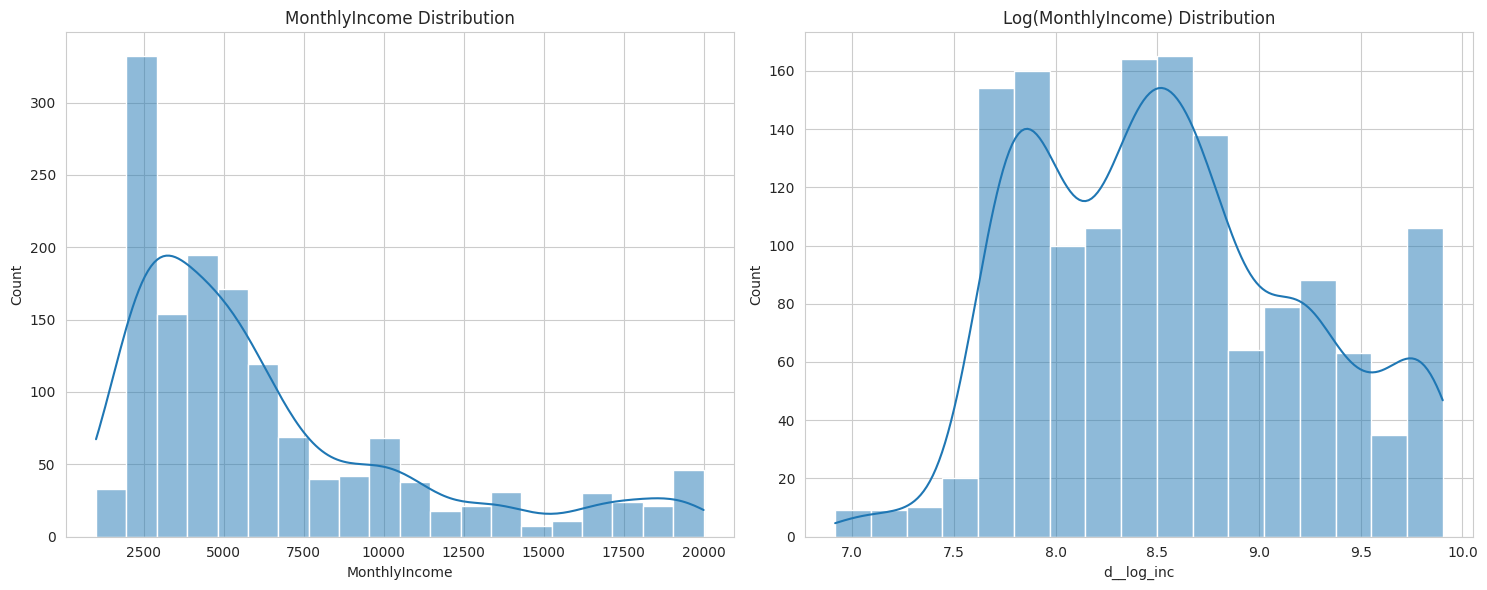

In [ ]:
# Visualize income distribution before and after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(d__er['MonthlyIncome'], kde=True, ax=ax1)
ax1.set_title('MonthlyIncome Distribution')
sns.histplot(d__er['d__log_inc'], kde=True, ax=ax2)
ax2.set_title('Log(MonthlyIncome) Distribution')
plt.tight_layout()
plt.show()

**# Step 3 & 4: Convert class columns to numbers in both datasets**

In [ ]:
for df, prefix in [(d__er, 'er'), (d__eg, 'eg')]:
    for col in df.select_dtypes(include=['object']).columns:
        df[f'd__{prefix}_{col}_num'] = pd.Categorical(df[col]).codes + 1

In [ ]:
# Display transformed columns
print("\nTransformed columns in employee_rating:")
print(d__er.head())

print("\nTransformed columns in employee_general:")
print(d__eg.head())


Transformed columns in employee_rating:
   EmployeeNumber              Department EnvironmentSatisfaction  \
0               1                   Sales                  Medium   
1               2  Research & Development                    High   
2               4  Research & Development               Very High   
3               5  Research & Development               Very High   
4               7  Research & Development                     Low   

                 JobRole PerformanceRating  YearsAtCompany  \
0        Sales Executive         Excellent               6   
1     Research Scientist       Outstanding              10   
2  Laboratory Technician         Excellent               0   
3     Research Scientist         Excellent               8   
4  Laboratory Technician         Excellent               2   

   YearsInCurrentRole  MonthlyIncome  d__log_inc  d__er_Department_num  \
0                   4           5993    8.698347                     3   
1                   7  

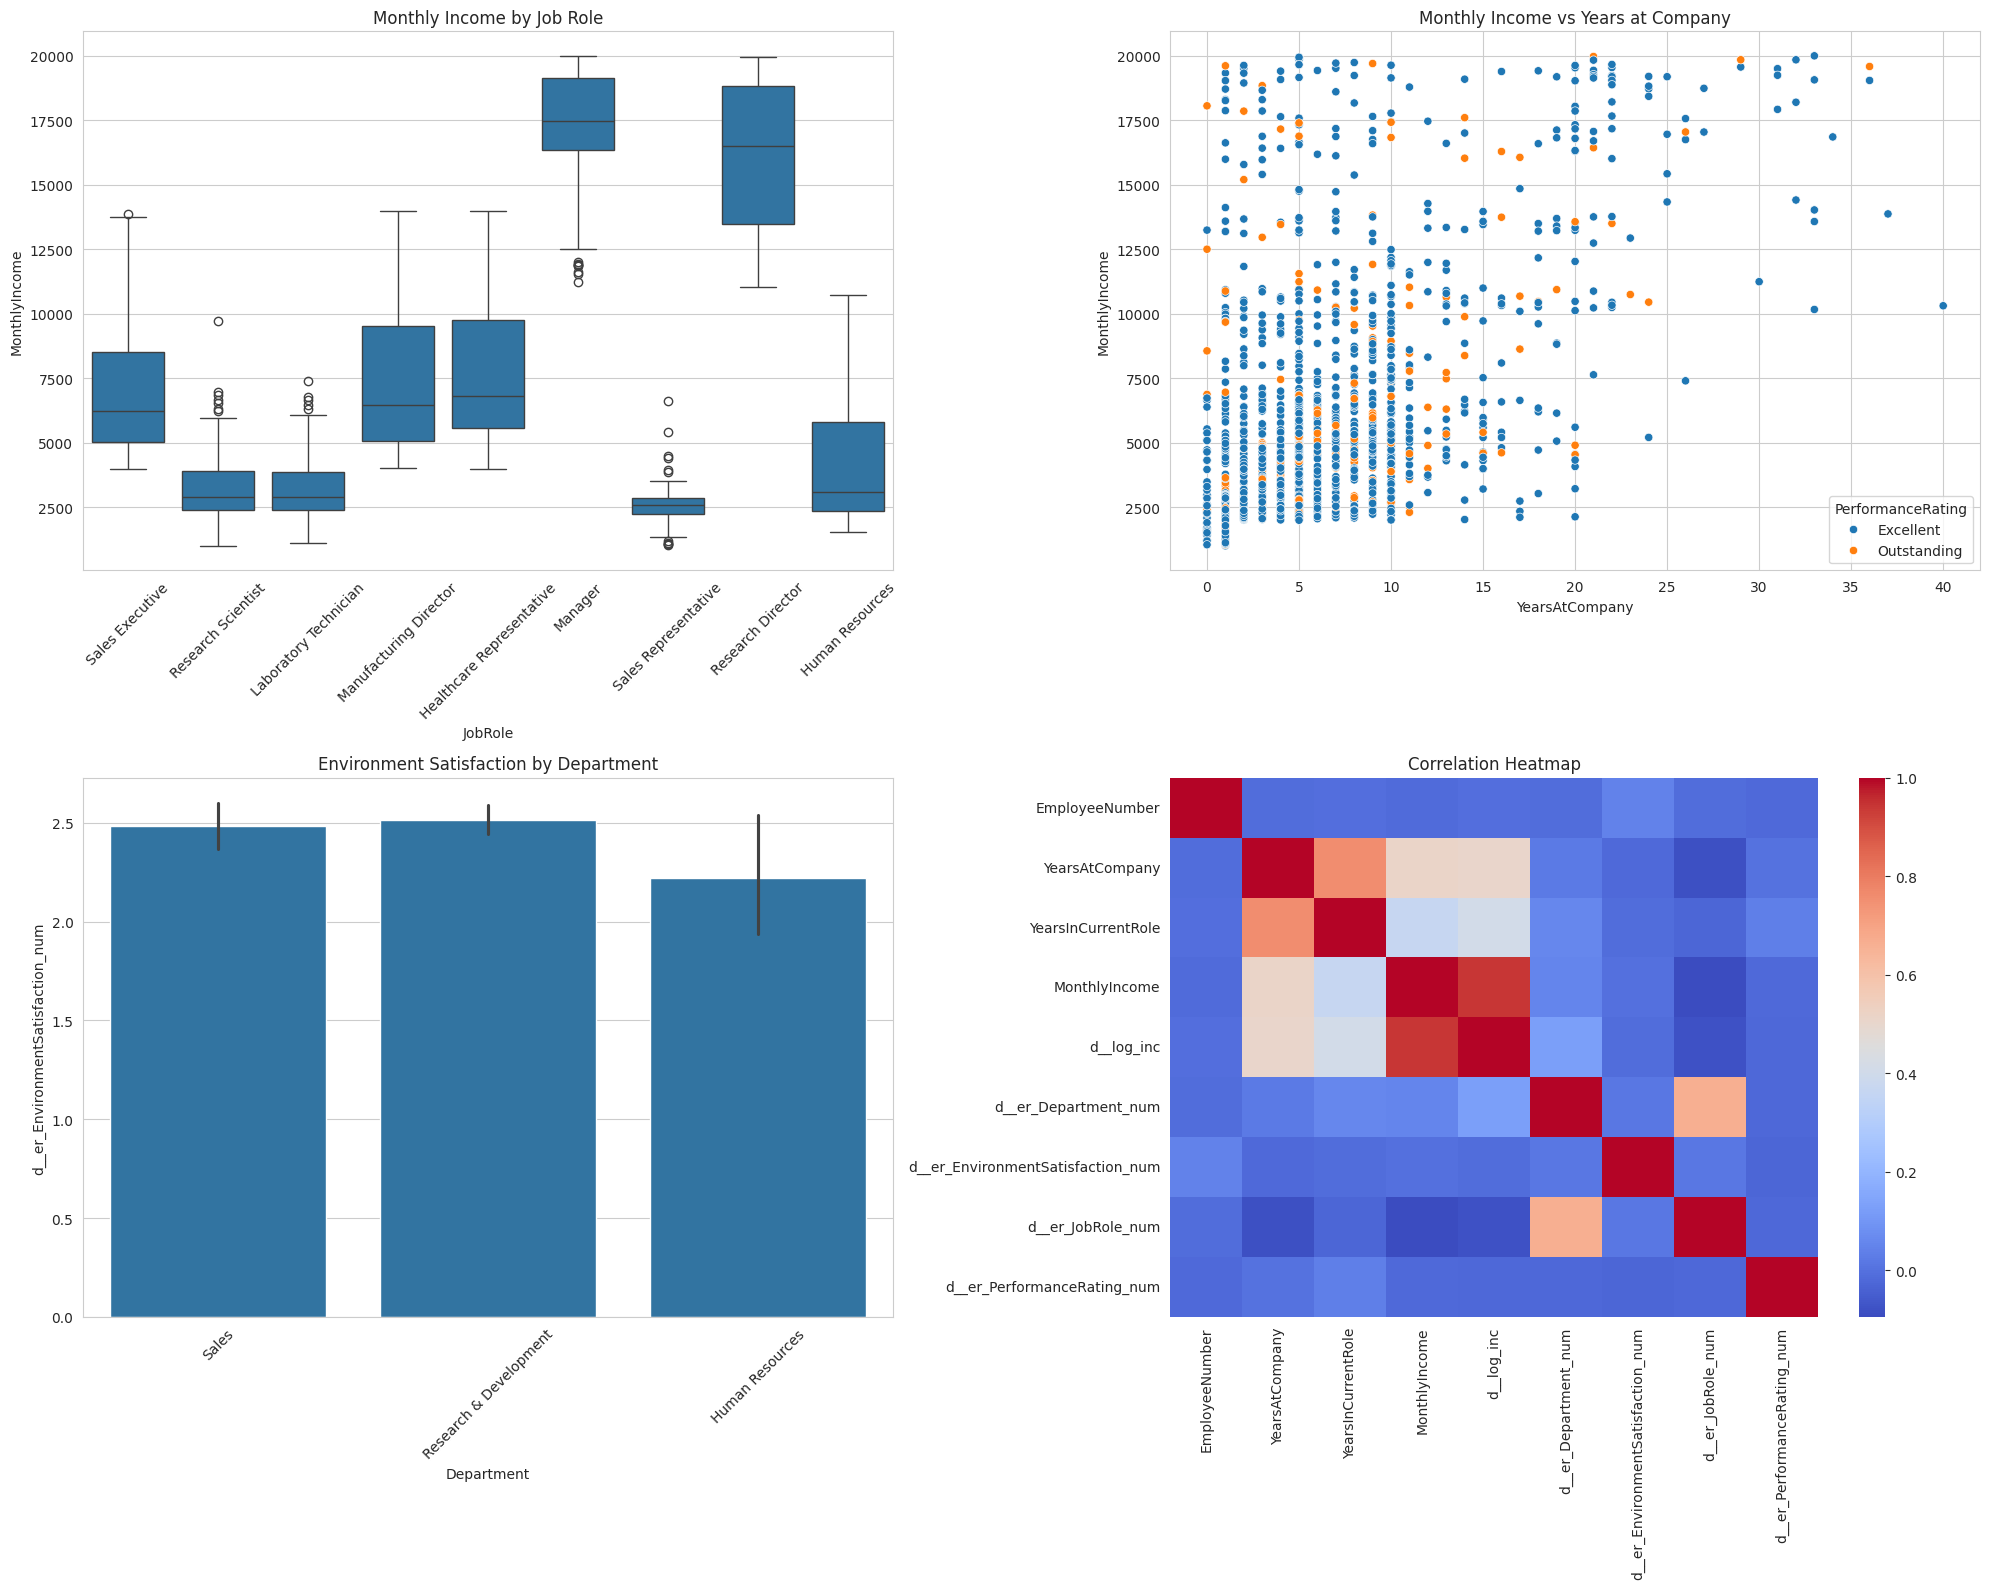

In [ ]:
# Visualizations of Employee Rating Dataset
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.boxplot(x='JobRole', y='MonthlyIncome', data=d__er, ax=axes[0, 0])
axes[0, 0].set_title('Monthly Income by Job Role')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='PerformanceRating', data=d__er, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Income vs Years at Company')

sns.barplot(x='Department', y='d__er_EnvironmentSatisfaction_num', data=d__er, ax=axes[1, 0])
axes[1, 0].set_title('Environment Satisfaction by Department')
axes[1, 0].tick_params(axis='x', rotation=45)

numeric_cols = d__er.select_dtypes(include=[np.number]).columns
sns.heatmap(d__er[numeric_cols].corr(), annot=False, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

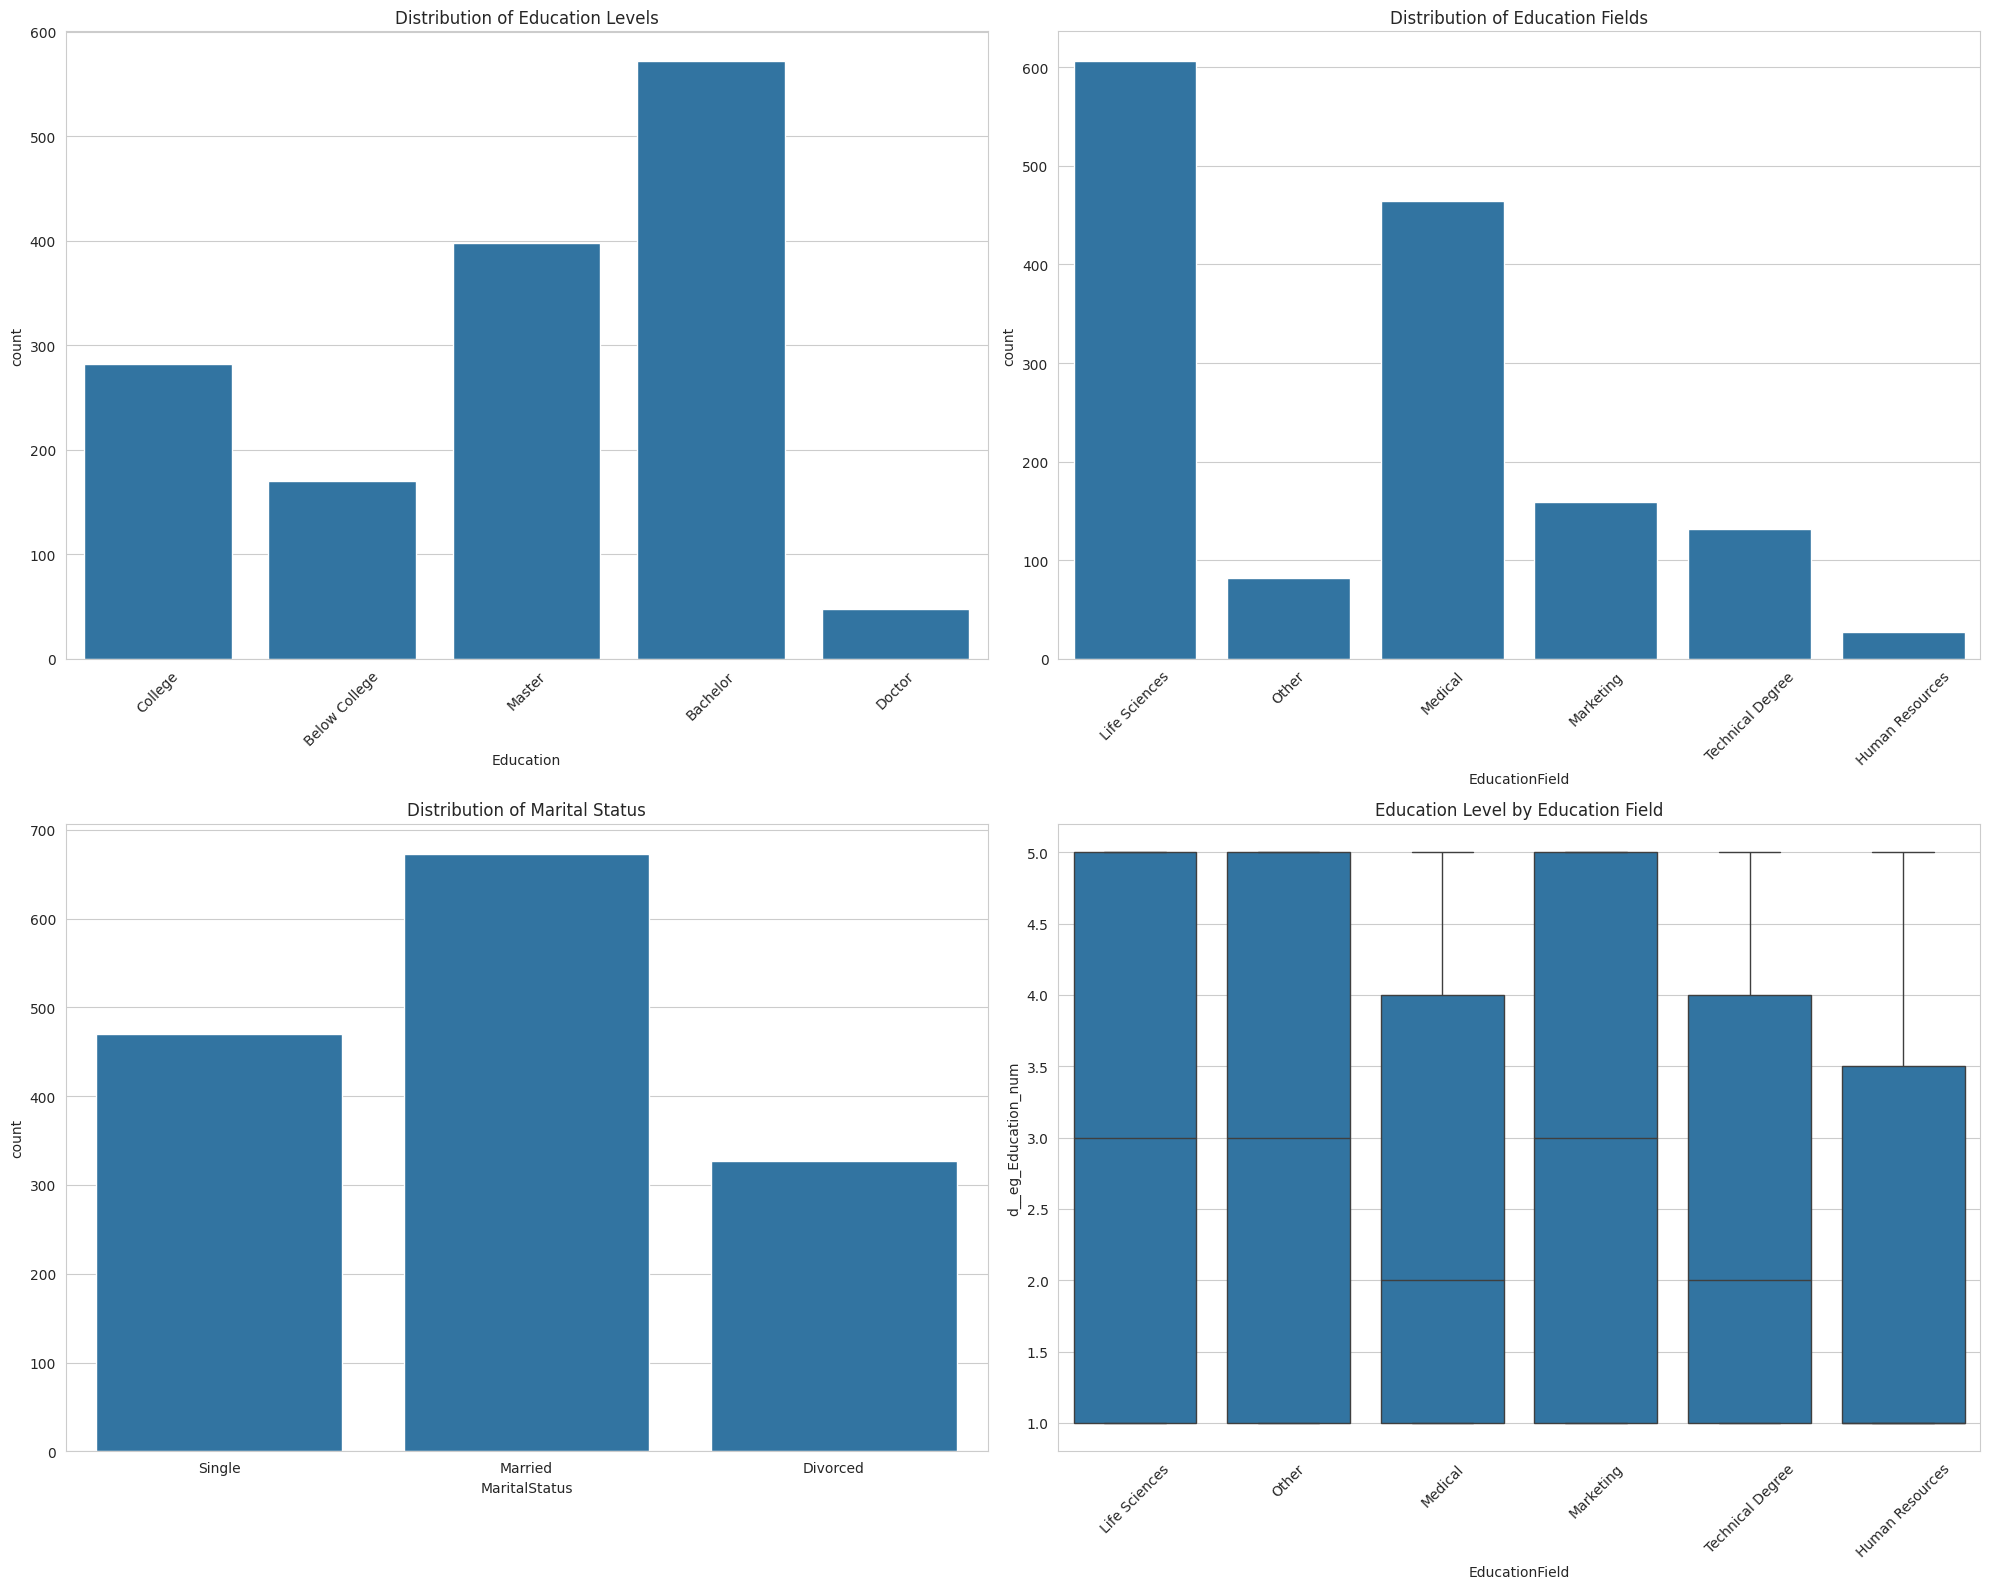

In [ ]:
# Visualizations of Employee General Dataset
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.countplot(x='Education', data=d__eg, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Education Levels')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='EducationField', data=d__eg, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Education Fields')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='MaritalStatus', data=d__eg, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Marital Status')

sns.boxplot(x='EducationField', y='d__eg_Education_num', data=d__eg, ax=axes[1, 1])
axes[1, 1].set_title('Education Level by Education Field')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**# Step 5: Merge datasets**

In [ ]:
d__merged = pd.merge(d__er, d__eg, on='EmployeeNumber', suffixes=('_rating', '_general'))

# Display merged dataset info
print("\nMerged Dataset Info:")
print(d__merged.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeNumber                     1470 non-null   int64  
 1   Department                         1470 non-null   object 
 2   EnvironmentSatisfaction            1470 non-null   object 
 3   JobRole                            1470 non-null   object 
 4   PerformanceRating                  1470 non-null   object 
 5   YearsAtCompany                     1470 non-null   int64  
 6   YearsInCurrentRole                 1470 non-null   int64  
 7   MonthlyIncome                      1470 non-null   int64  
 8   d__log_inc                         1470 non-null   float64
 9   d__er_Department_num               1470 non-null   int8   
 10  d__er_EnvironmentSatisfaction_num  1470 non-null   int8   
 11  d__er_JobRole_num                 

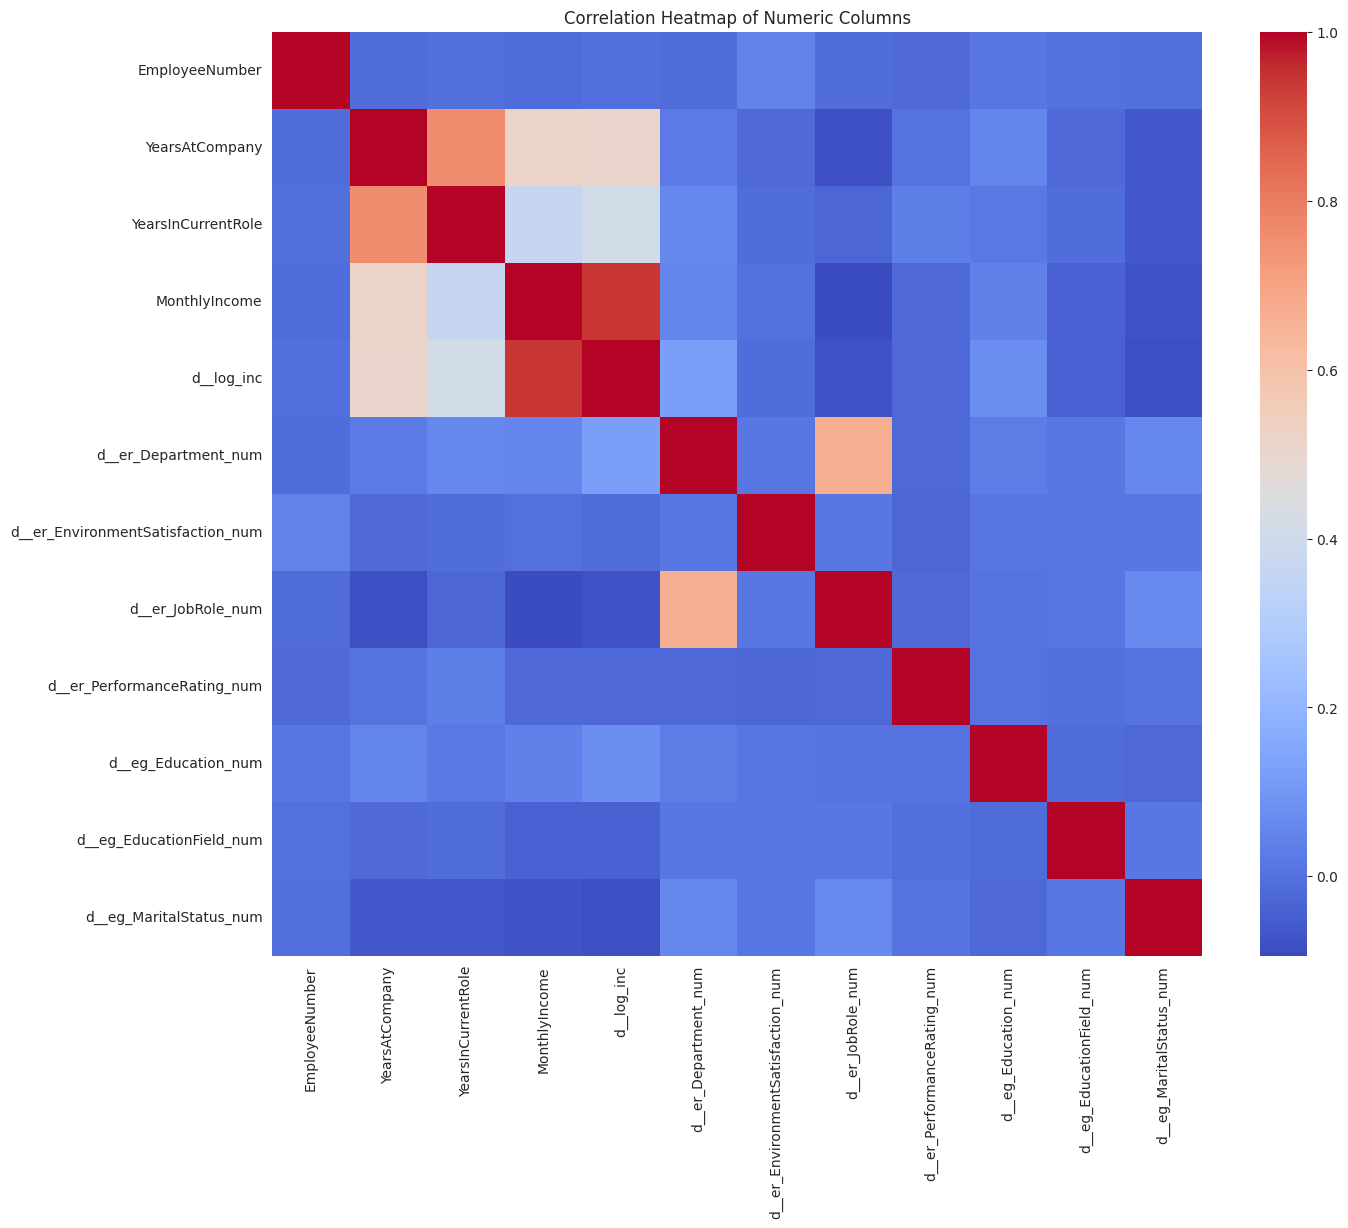

In [ ]:
# Visualize correlations in the merged dataset
plt.figure(figsize=(15, 12))
numeric_cols = d__merged.select_dtypes(include=[np.number]).columns
sns.heatmap(d__merged[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
# Summary statistics
print("\nSample rows from the merged dataset:")
print(d__merged.head())
print("\nSummary statistics of numeric columns:")
print(d__merged.describe())


Sample rows from the merged dataset:
   EmployeeNumber              Department EnvironmentSatisfaction  \
0               1                   Sales                  Medium   
1               2  Research & Development                    High   
2               4  Research & Development               Very High   
3               5  Research & Development               Very High   
4               7  Research & Development                     Low   

                 JobRole PerformanceRating  YearsAtCompany  \
0        Sales Executive         Excellent               6   
1     Research Scientist       Outstanding              10   
2  Laboratory Technician         Excellent               0   
3     Research Scientist         Excellent               8   
4  Laboratory Technician         Excellent               2   

   YearsInCurrentRole  MonthlyIncome  d__log_inc  d__er_Department_num  \
0                   4           5993    8.698347                     3   
1                   7     

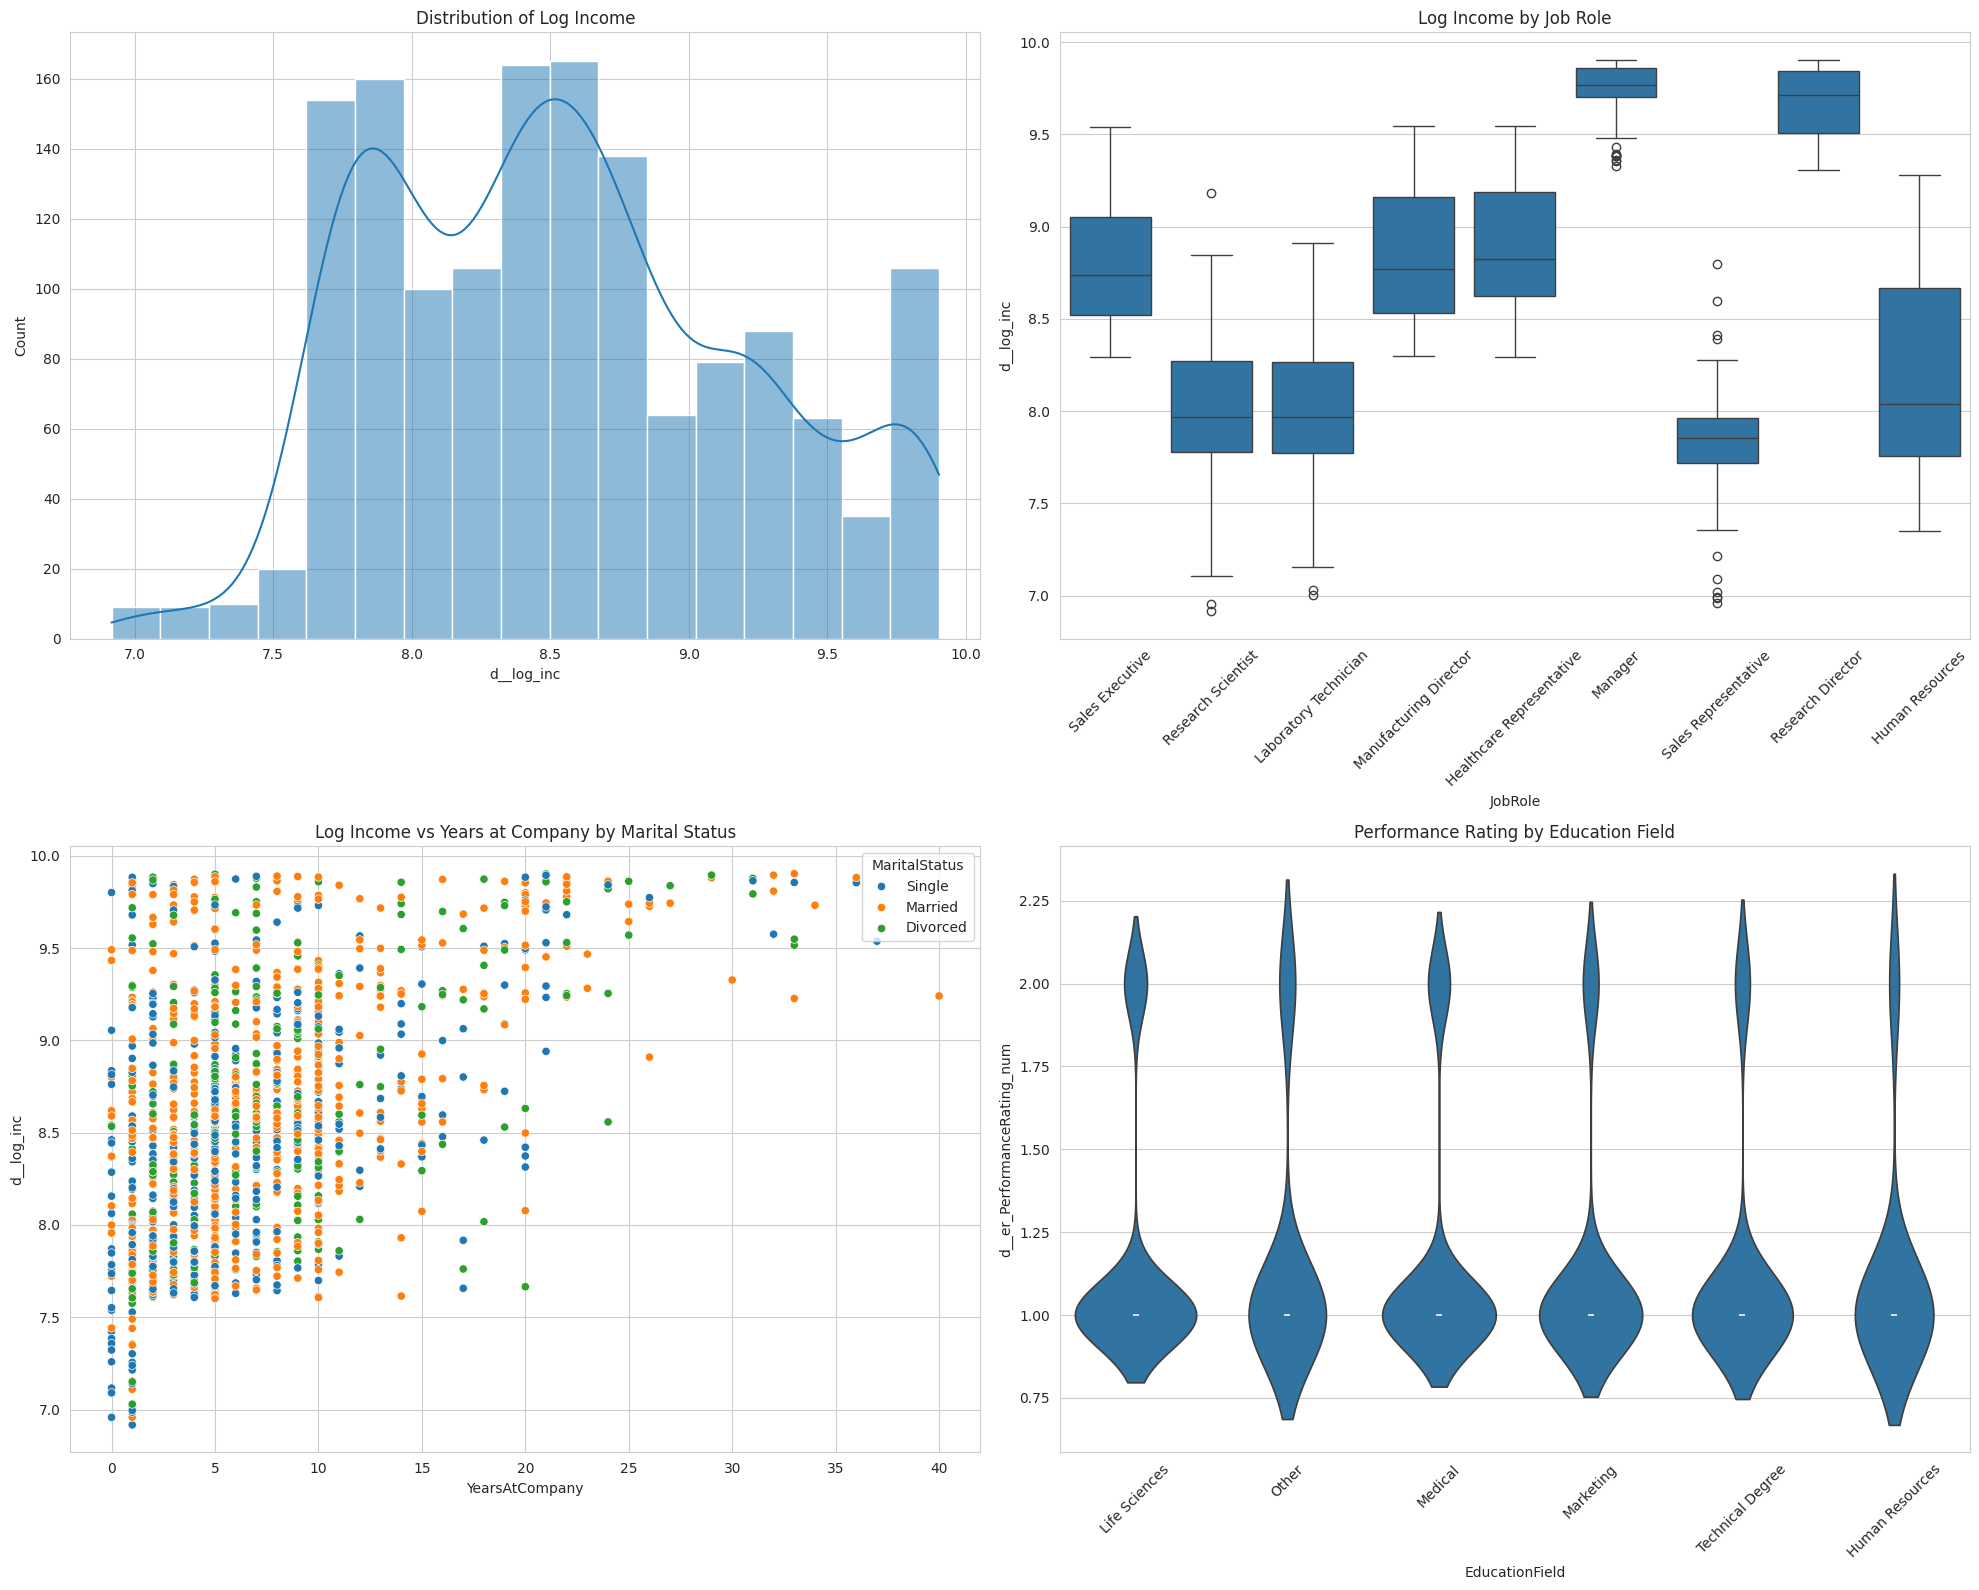

In [ ]:
# Visualize distribution of key variables in merged dataset
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.histplot(d__merged['d__log_inc'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Log Income')

sns.boxplot(x='JobRole', y='d__log_inc', data=d__merged, ax=axes[0, 1])
axes[0, 1].set_title('Log Income by Job Role')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.scatterplot(x='YearsAtCompany', y='d__log_inc', hue='MaritalStatus', data=d__merged, ax=axes[1, 0])
axes[1, 0].set_title('Log Income vs Years at Company by Marital Status')

sns.violinplot(x='EducationField', y='d__er_PerformanceRating_num', data=d__merged, ax=axes[1, 1])
axes[1, 1].set_title('Performance Rating by Education Field')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()